In [71]:
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [41]:
def limpa_header(series_of_strings):
    return map(lambda x: x.lower().replace(' ', '_'), series_of_strings)

In [42]:
def converte_para_float(series_of_strings):
    return [float(x.replace(',', '.')) for x in series_of_strings]

In [60]:
df=pd.read_csv('../datasets/taxas.csv', sep=";")

In [61]:
df.columns = limpa_header(df.columns)

In [62]:
df.loc[:, 'taxa_compra_manha'] = converte_para_float(df.taxa_compra_manha)
df.loc[:, 'taxa_venda_manha'] = converte_para_float(df.taxa_venda_manha)
df.loc[:, 'pu_compra_manha'] = converte_para_float(df.pu_compra_manha)
df.loc[:, 'pu_venda_manha'] = converte_para_float(df.pu_venda_manha)

In [63]:
df.loc[:, 'date'] = df.data_base.map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [64]:
df.head()

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,date
0,Tesouro Selic,18/06/2008,12/12/2006,-0.01,0.01,2946.02,2945.14,"2943,69",2006-12-12
1,Tesouro Selic,18/06/2008,13/12/2006,-0.01,0.01,2947.47,2946.59,"2945,13",2006-12-13
2,Tesouro Selic,18/06/2008,14/12/2006,-0.01,0.01,2948.92,2948.04,"2946,59",2006-12-14
3,Tesouro Selic,18/06/2008,15/12/2006,-0.01,0.01,2950.37,2949.49,"2948,04",2006-12-15
4,Tesouro Selic,18/06/2008,18/12/2006,-0.01,0.01,2951.81,2950.94,"2949,49",2006-12-18


In [65]:
ipca = df[df.tipo_titulo == 'Tesouro IPCA+']

In [66]:
vcto = ipca.data_vencimento.unique()

### Analisar os títulos disponíveis

In [70]:
df.date.max()

Timestamp('2018-08-17 00:00:00')

In [68]:
titulos_dia = df[df.date == dt.datetime.strftime(dt.datetime.today(), "%Y-%m-%d")]

In [69]:
titulos_dia

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,date


15/05/2019


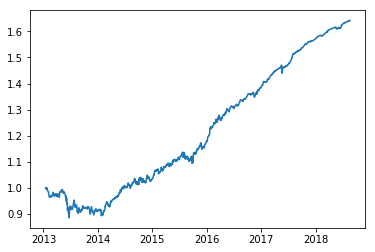

arima


/Users/renantardelli/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


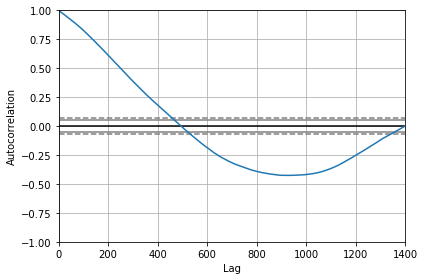

15/05/2015


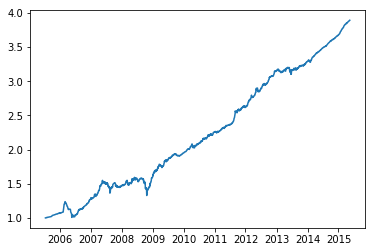

arima


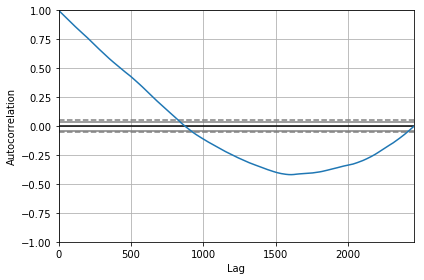

15/08/2024


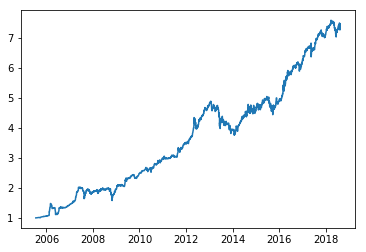

arima


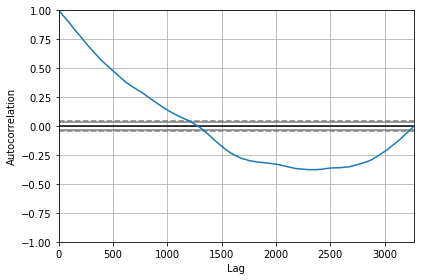

15/05/2035


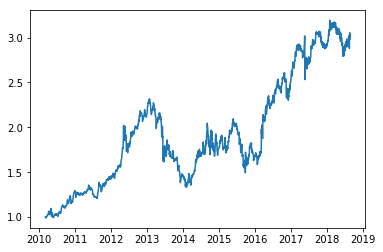

arima


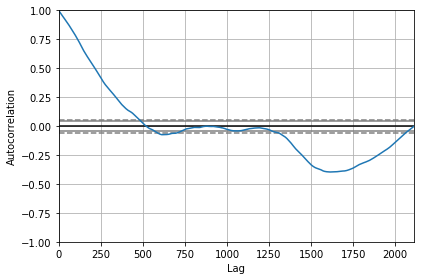

15/05/2045


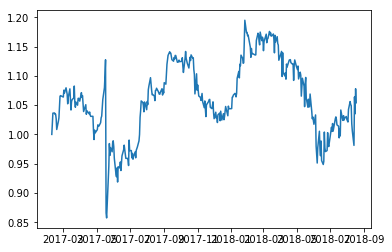

arima


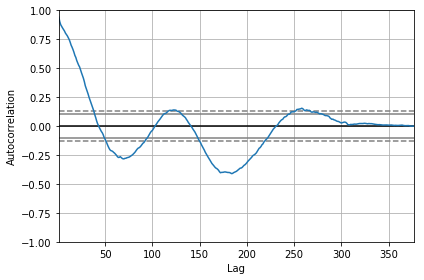

In [73]:
for i in vcto:
    titulo = ipca[ipca.data_vencimento == i].sort_values('date')
    print i
    plt.plot(titulo.date, titulo.pu_compra_manha/titulo.pu_compra_manha.iloc[0])
    plt.show()
    print 'arima'
    autocorrelation_plot(titulo.pu_compra_manha)
    plt.tight_layout()
    plt.show()